In [1102]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import math

https://visgraf.github.io/tcv-2026/mg-tarefas.pdf

# Representação do Disco

## Representação uniforme

### Primeira tentativa

Na representação uniforme, dividimos a imagem em uma malha quadriculada e para cada quadrado classificamos se está dentro do disco, passa pela borda ou está fora.

In [1103]:
#Centro do disco
cx = 0.3 
cy = 0.4
#Raio do disco
r = 0.21

#Função para classificar se um ponto está dentro ou fora do disco
def inside_circle(x, y): 
    return (x - cx)** 2 + (y - cy)**2 <= r**2

A ideia para verificar se um quadrado está dentro, fora ou passar pela borda do disco é olhar os seus quatro vértices.  

Caso os 4 vértices estejam dentro, então classificamos que o quadrado está dentro.  
Caso os 4 vértices estejam fora, então classificamos que está fora (**atenção**).  
Caso não aconteça nenhum desses casos, então a borda do disco passa por esse quadrado.


In [1104]:
def classify_circle(x, y, l):
    """

    Classifica o quadrado em relação ao disco

    Parâmetros:
    x: x do canto inferior esquerdo do quadrado
    y: y do canto inferior esquerdo do quadrado
    l: lado do quadrado

    Retorno:
    Classificação do quadrado
    
    """
    
    corners = [(x, y), (x+l, y), (x+l, y+l), (x, y+l)]

    count = 0
    for xp, yp in corners:
        if inside_circle(xp, yp):
            count+=1

    if count == 4:
        return 'inside'
    elif count == 0:
        return 'outside'
    else:
        return 'undefined'

Com isso, pegamos a figura e dividimos em quadrados e classificamos cada um deles.

In [1105]:
def draw_uniform(classify, ax, xi, yi, l, profundidade):
    """
    
    Desenha uma malha uniforme de quadrados e colore 
    de acordo com sua classifcação em relação a figura.

    Parâmetros:
    classify: Função de classificação do quadrado
    ax: Eixo do matplotlib onde os quadrados são desenhados
    xi: x do canto inferior esquerdo do quadrado
    yi: y do canto inferior esquerdo do quadrado
    l: Tamanho do quadrado
    profundidade: Número de divisões de quadrado

    """

    p = l/profundidade #Distancia entre cada aresta
    
    for i in range(profundidade):
        for j in range(profundidade):
            px = i*p #Passo de x
            py = j*p #Passo de y

            classificacao = classify(xi+ px, yi+ py, p)

            if classificacao == 'outside':
                reta = patches.Rectangle((xi+px, yi+py), p, p, facecolor='#6fa8ff', edgecolor='black')
                ax.add_patch(reta)

            if classificacao == 'inside':
                reta = patches.Rectangle((xi+px, yi+py), p, p, facecolor='#e06666', edgecolor='black')
                ax.add_patch(reta)

            if classificacao == 'undefined':
                reta = patches.Rectangle((xi + px, yi + py), p, p,facecolor='#b7b7b7', edgecolor='black')
                ax.add_patch(reta)


Com todas as funções feitas, testamos a representação uniforme com uma malha 40x40.

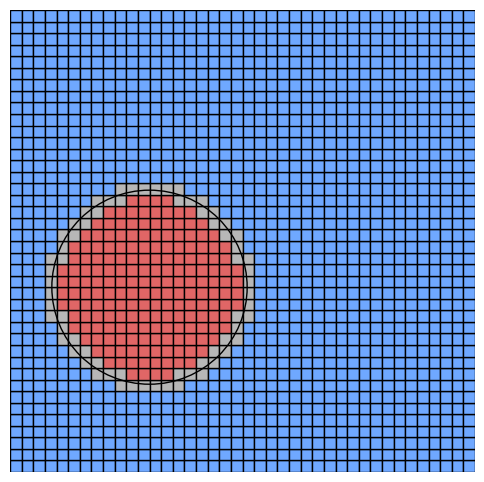

In [1106]:
fig, ax = plt.subplots(figsize=(6,6))

draw_uniform(classify_circle, ax, 0.0, 0.0, 1, 40)

circle = plt.Circle((cx, cy), r, edgecolor='black', facecolor='none')
ax.add_patch(circle)
ax.axis('off')

plt.show()

Para esse caso funciona, mas pode ocorrer em alguns casos que os 4 vértices do quadrado esteja fora da figura, assim ele é classificado como se estivesse fora, mesmo nao sendo (exemplo abaixo). Então temos que classificar de outra forma.

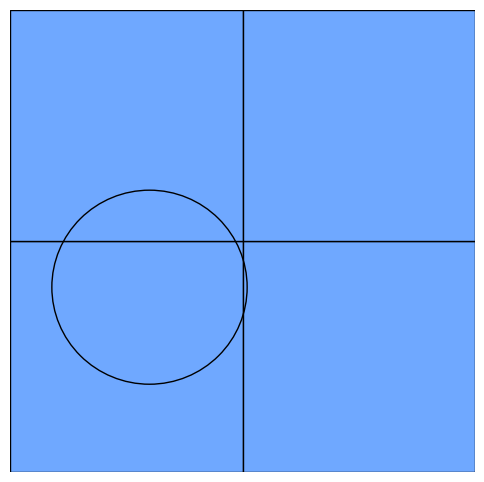

In [1107]:
fig, ax = plt.subplots(figsize=(6,6))

draw_uniform(classify_circle, ax, 0.0, 0.0, 1, 2)

circle = plt.Circle((cx, cy), r, edgecolor='black', facecolor='none')
ax.add_patch(circle)

ax.axis('off')

plt.show()

### Outra forma de classifição 

A ideia dessa forma de classificação é pegar os 4 vértices do quadrado e pegar o mais próximo e o mais distante do centro do disco, dessa forma pode acontecer 3 coisas:  

**explicar**

In [1108]:
def dist_min(x, y, cx, cy, p):
    dx = max(x-cx, 0, cx-x-p)
    dy = max(y-cy, 0, cy-y-p)
    
    return math.sqrt(dx**2 + dy**2)

def dist_max(x, y, cx, cy, p):
    corners = [(x, y), (x+p, y), (x+p, y+p), (x, y+p)]
    dist = [math.dist((cx, cy), c) for c in corners]

    return max(dist)

In [1109]:
def classify_circle(x, y, p):
    
    dmin = dist_min(x, y, cx, cy, p)
    dmax = dist_max(x, y, cx, cy, p)


    if dmin > r:
        return 'outside'
    elif dmax < r:
        return 'inside'
    else:
        return 'undefined'

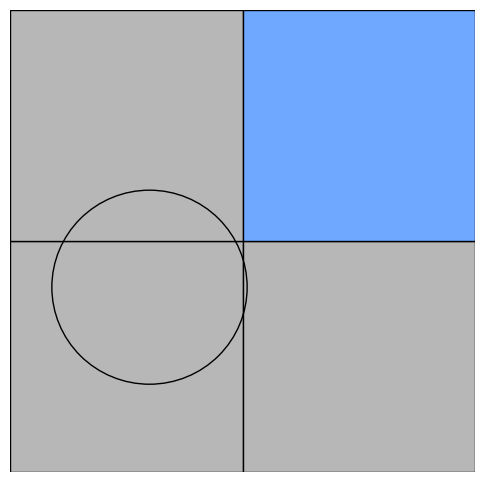

In [1110]:
fig, ax = plt.subplots(figsize=(6,6))

draw_uniform(classify_circle, ax, 0.0, 0.0, 1, 2)

circle = plt.Circle((cx, cy), r, edgecolor='black', facecolor='none')
ax.add_patch(circle)
ax.axis('off')

plt.show()

## Representação adaptativa

In [1111]:
def draw_two(classify, ax, xi, yi, l, k = 6):
    if k == 0:
        return

    classificacao = classify(xi, yi, l)

    if classificacao == 'outside':
        reta = patches.Rectangle((xi, yi), l, l, facecolor='#6fa8ff', edgecolor='black')
        ax.add_patch(reta)

    if classificacao == 'inside':
        reta = patches.Rectangle((xi, yi), l, l, facecolor='#e06666', edgecolor='black')
        ax.add_patch(reta)

    if classificacao == 'undefined':
        reta = patches.Rectangle((xi, yi), l, l,facecolor='#b7b7b7', edgecolor='black')
        ax.add_patch(reta)

        #Dividir em 4
        draw_two(classify, ax, xi, yi, l/2, k-1)
        draw_two(classify, ax, xi+l/2, yi, l/2, k-1)
        draw_two(classify, ax, xi+l/2, yi+l/2, l/2, k-1)
        draw_two(classify, ax, xi, yi+l/2, l/2, k-1)
        
        

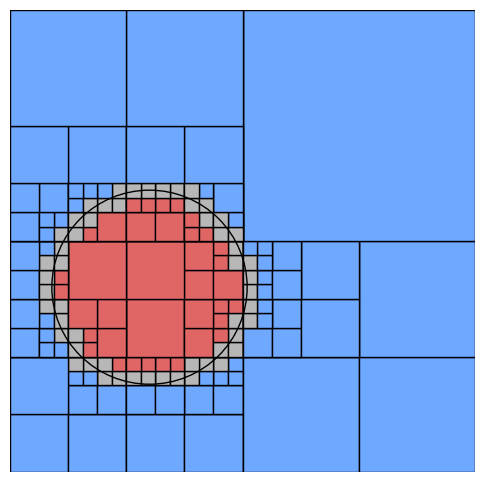

In [1112]:
fig, ax = plt.subplots(figsize=(6,6))

draw_two(classify_circle, ax, 0.0, 0.0, 1)

circle = plt.Circle((cx, cy), r, edgecolor='black', facecolor='none')
ax.add_patch(circle)
ax.axis('off')

plt.show()

# Representação da Parabola

In [1113]:
#Função
c = 0

def above_curve(x, y):
    return y >= x**2 + c

In [1114]:
#Classificar se um quadrado está dentro ou fora
#Parcialmente errado (casos 1 e 2)

def classify_curve(x, y, p):
    
    corners = [(x, y), (x+p, y), (x+p, y+p), (x, y+p)]

    count = 0
    for xp, yp in corners:
        if above_curve(xp, yp):
            count+=1

    if count == 4:
        return 'inside'
    elif count == 0:
        return 'outside'
    else:
        return 'undefined'

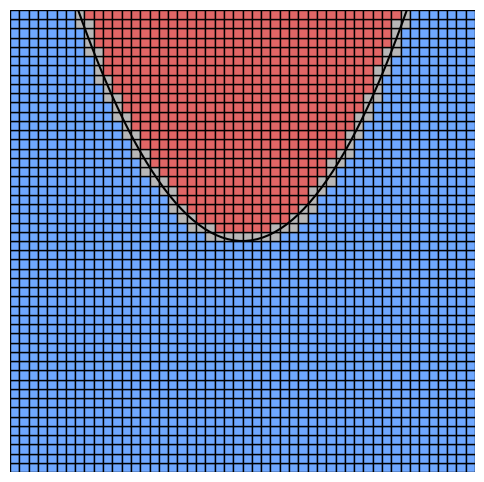

In [1115]:
fig, ax = plt.subplots(figsize=(6,6))

draw_uniform(classify_curve, ax, -2, -2, 4, 50)

ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])

x = np.linspace(-10, 10, 400)
y = x**2 + c
plt.plot(x, y, color='black')

ax.axis('off')

plt.show()

In [1116]:
def classify_curve(x0, y0, p):

    x1 = x0 + p
    y1 = y0 + p

    # x onde x^2 é máximo no intervalo
    xs = [x0, x1]
    xmax = max(xs, key=lambda t: abs(t))

    # x onde x^2 é mínimo no intervalo
    if x0 <= 0 <= x1:
        xmin = 0
    else:
        xmin = min(xs, key=lambda t: abs(t))

    f_min = y0 - (xmax**2 + c)
    f_max = y1 - (xmin**2 + c)

    if f_min >= 0:
        return "inside"

    if f_max < 0:
        return "outside"

    return "undefined"


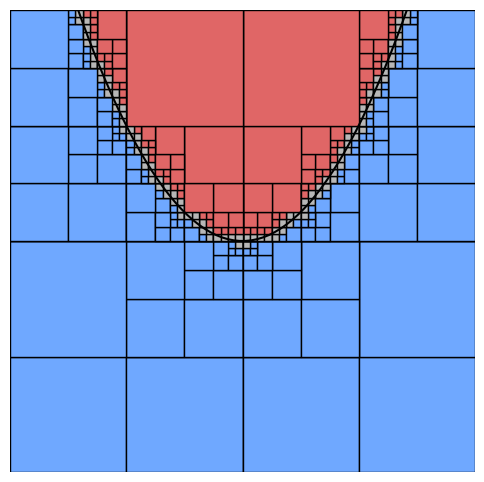

In [1117]:
fig, ax = plt.subplots(figsize=(6,6))


draw_two(classify_curve, ax, -2, -2, 4, k =7)

ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])

x = np.linspace(-10, 10, 400)
y = x**2 + c
plt.plot(x, y, color='black')

ax.axis('off')

plt.show()

## Plot aleatório

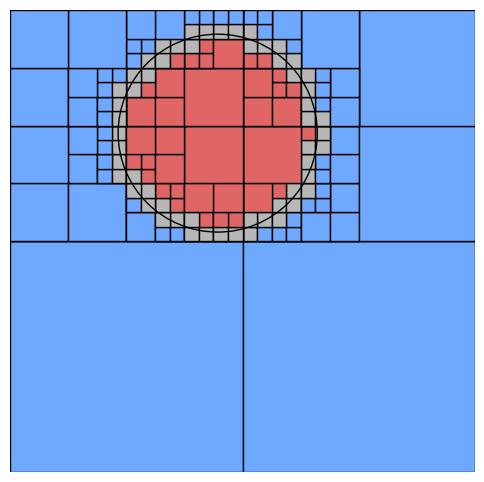

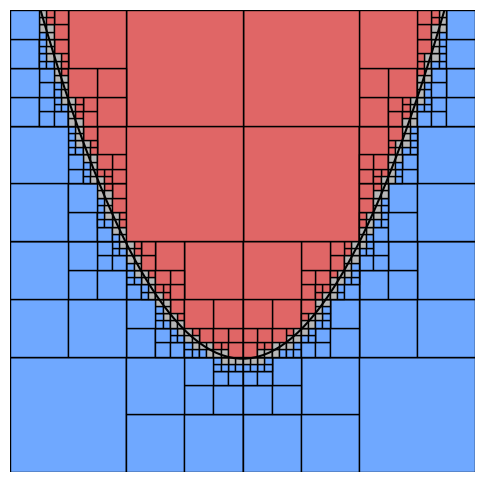

In [1123]:
import random


#Plot disco

cx = random.uniform(0.25, 0.75)
cy = random.uniform(0.25, 0.75)
r = random.uniform(0.1, 0.40)

fig, ax = plt.subplots(figsize=(6,6))

draw_two(classify_circle, ax, 0.0, 0.0, 1)

circle = plt.Circle((cx, cy), r, edgecolor='black', facecolor='none')
ax.add_patch(circle)
ax.axis('off')

plt.show()


#Plot curva

c = random.uniform(-1.75, 1.75)

fig, ax = plt.subplots(figsize=(6,6))

draw_two(classify_curve, ax, -2, -2, 4, k =7)

ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])

x = np.linspace(-10, 10, 400)
y = x**2 + c
plt.plot(x, y, color='black')

ax.axis('off')

plt.show()
